# M/M/K System mit zustandsabhängigen Raten
Es wird ein System mit $K$ Bedieneinheiten betrachtet. Falls alle $K$ Plätze im System belegt sind, werden ankommende Anforderungen abgewiesen. Der Ankunftsprozess ist ein Poisson-Prozess mit zustandsabhängiger Rate $\lambda_i$ für $i=0,\dots,K-1$. Die Bedienzeit eines Jobs folgt einer exponentiellen Verteilung mit Rate $\mu$.

Das System wird in Kendall-Notation mit M/M/K/K oder M/M/K-0 dargestellt. Um die zustandsabhängigen Raten zu notieren, schreibt man oft auch $M_i/M/K/K$ bzw. $M_i/M/K-0$.

## Analyse des Systems
Es liegt ein Markoves System vor, d.h. der Zustandsprozess hat die Markov-Eigenschaft. Als Zustand des Systems wird die Anzahl $X$ der Jobs im System betrachtet. Zur Analyse der Zustandswahrscheinlichkeiten betrachten wir zunächst die Übergangsraten des Systems. Es liegt ein Geburts- und Sterbeprozess vor. 
![Zustandsübergangsdiagramm des M/M/K-0 Systems mit zustandsabhängigen Ankunftsraten](MMK-state-dependent-arrivals.png)

Die Übergangsrate von $i$ nach $i+1$ entspricht der Ankunftsrate $\lambda_i = i \lambda$ für ein gegebenes $\lambda$ und $i=0,\dots,K$. 

Die Bedienrate ist $\mu_i = i \mu$ für $i=1,\dots, K$.

Die Zustandswahrscheinlichkeit ist $P(X=i)=x(i)$.
Die Makrozustandsgleichungen lauten $\lambda_{i-1} x(i-1) = \mu_{i} x(i)$ für $i=0,\dots K-1$. Damit erhalten wir folgende Zustandswahrscheinlichkeiten, wobei $a = \lambda/\mu$.
$$
x(i) = \frac{\lambda_{i-1}}{\mu_i} x(i-1) = \frac{i \lambda}{i \mu} x(i-1) = a x(i-1) = a^i x(0)
$$

Die Wahrscheinlichkeit für $x(0)$ kann wie folgt berechnet werden.

$$1 = \sum_{i=0}^K x(i) = \sum_{i=0}^K a^i x(0) = x(0) \sum_{i=0}^K a^i = x(0) \frac{1-a^{K+1}}{1-a} \quad \Rightarrow \quad x(0) = \frac{1-a}{1-a^{K+1}}$$

## Blockierwahrscheinlichkeit
In diesem System gilt nicht die PASTA-Eigenschaft. Die Blockierwahrscheinlichkeit $p_B$ entspricht also nicht der Zustandswahrscheinlichkeit $x(K)$, d.h. $p_B \neq x(K)$. Es muss stattdessen die Zustandswahrscheinlichkeit $x_A(K)$ für ankommende Kunden berechnet werden. 

Die mittlere Ankunftsrate des Systems kann mit den Zustandswahrscheinlichkeiten $x(i)$ berechnet werden.
$$
\lambda^* = E[\lambda] = \sum_{i=0}^K \lambda_i x(i) = \sum_{i=0}^K (i+1)\lambda a^i \frac{1-a}{1-a^{K+1}} = \lambda \left( \frac{2-a}{1-a}+K - \frac{K+1}{1-a^{K+1}} \right)
$$

Da die PASTA-Eigenschaft nicht gilt, muss nach den relativen Häufigkeiten der Ankünfte gewichtet werden, um die Zustandswahrscheinlichkeiten $x_A(i)$ bei Ankünften herzuleiten.
$$
\lambda_K \cdot x(K) = \lambda^* \cdot x_A(K) = \lambda^* \cdot p_B \quad \Rightarrow \quad p_B = \frac{(K+1)\lambda}{\lambda^*} x(K) = \frac{(a-1)^2 (K+1) a^K}{((a-1) K+a-2) a^{K+1}+1}
$$


x(0)=0.5079 für a=0.5 und K=5
lambda*=1.9048 für a=0.5 und K=5 und lambda=1.0
pB=0.0500 für a=0.5 und K=5


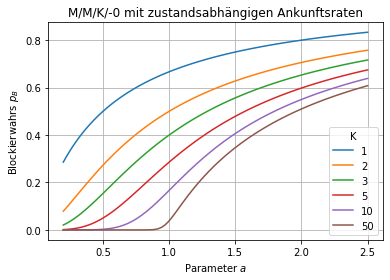

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def x0(a=1, K=10):
    return (1-a)/(1-a**(K+1))

def EL(L, a=1, K=10):
    return (L + a**(1 + K)*(-2 + a + (-1 + a)*K)*L)/((-1 + a)*(-1 + a**(1 + K)))

def pb(a=1, K=10):
    return ((-1 + a)**2*a**K*(1 + K))/(1 + a**(1 + K)*(-2 + a + (-1 + a)*K))

a = np.linspace(0.2, 2.5, 100)

for k in (1, 2, 3, 5, 10, 50):
    plt.plot(a, pb(a=a, K=k), label=k)

plt.grid()
plt.xlabel('Parameter $a$')
plt.ylabel('Blockierwahrs'' $p_B$')
plt.legend(title='K');
plt.title('M/M/K/-0 mit zustandsabhängigen Ankunftsraten');

# Konkrete Werte für ein Beispiel
a, K, lam = 0.5, 5, 1.0
print(f'x(0)={x0(a=a,K=K):.4f} für a={a} und K={K}')
print(f'lambda*={EL(L=lam, a=a,K=K):.4f} für a={a} und K={K} und lambda={lam}')
print(f'pB={pb(a=a,K=K):.4f} für a={a} und K={K}')

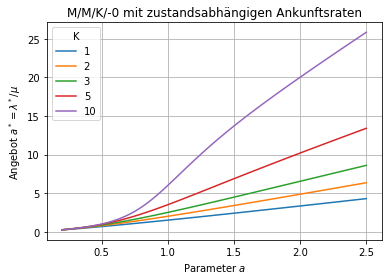

In [4]:
a = np.linspace(0.2, 2.5, 100)

for k in (1, 2, 3, 5, 10):
    lam = 1
    mu = lam/a
    astar = EL(lam, a=a, K=k)/mu
    plt.plot(a, astar,label=k)
  
plt.grid()
plt.xlabel('Parameter $a$')
plt.ylabel('Angebot $a^*=\lambda^*/\mu$')
plt.legend(title='K');
plt.title('M/M/K/-0 mit zustandsabhängigen Ankunftsraten');
    

## Mittlere Anzahl Nutzer im System
Nach Little gilt $E[X] = (1-p_B)\lambda^* \cdot E[B] = (1-p_B)\lambda^* \cdot \frac{1}{\mu}$.

Andere Berechnung: 
$E[X]=\sum_{i=0}^K i \cdot x(i) = \sum_{i=0}^K i \cdot a^i \cdot x(0) = x(0) \frac{a(Ka^{K+1}-(K+1)a^K+1)}{(1-a)^2} = \frac{a(Ka^{K+1}-(K+1)a^K+1)}{(1-a)(1-a^{K+1})}$




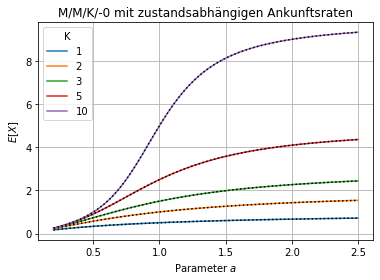

In [5]:
def EX(L, a=1, K=10):
    mu = L/a
    return (1-pb(a=a, K=K)) * EL(L, a=a, K=K)/mu

def EX2(a=1, K=10):     
    i = np.arange(K+1)
    return [(i*thea**i*x0(a=thea,K=K)).sum() for thea in a]

a = np.linspace(0.2, 2.5, 100)

for k in (1, 2, 3, 5, 10):
    lam = 1     
    plt.plot(a, EX(lam, a=a, K=k) ,label=k)
    plt.plot(a, EX2(a=a, K=k) , 'k:')
  
plt.grid()
plt.xlabel('Parameter $a$')
plt.ylabel('$E[X]$')
plt.legend(title='K');
plt.title('M/M/K/-0 mit zustandsabhängigen Ankunftsraten');


## Vergleich mit einem M/M/K-0 Verlustsystem
Die Blockierwahrscheinlichkeit in einem M/M/K-0 Verlustsystem mit $\lambda_i=\lambda$ und $\mu_i=\mu$ liefert die gleichen Zustandswahrscheinlichkeiten. Allerdings ist die Blockierwahrscheinlichkeit hier aufgrund von PASTA laut der Erlang-B Formel.
$$
p_B = \frac{\frac{a^K}{K!}}{\sum_{i=0}^K\frac{a^i}{i!}}
$$


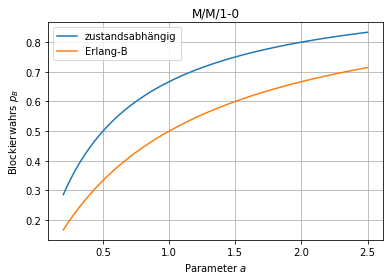

In [6]:
from math import factorial
def ErlangB (a=1, K=10):
    InvB = 1.0
    for j in range(1, K+1):
        InvB = 1.0 + InvB * (j/a)
    return (1.0 / InvB)

def iterErlangB (a=1, K=10):
    return [ErlangB(thea,K) for thea in a]

a = np.linspace(0.2, 2.5, 100)

k=1
plt.plot(a, pb(a=a, K=k), label='zustandsabhängig')
plt.plot(a, iterErlangB(a=a, K=k), label='Erlang-B')

plt.grid()
plt.xlabel('Parameter $a$')
plt.ylabel('Blockierwahrs'' $p_B$')
plt.legend();
plt.title(f'M/M/{k}-0');

In [7]:
# Konkrete Werte für ein Beispiel
a, K, lam = 1.2, 20, 1.2 
print('Zustandsabhängige Ankunftsraten')
print(f'x(0)={x0(a=a,K=K):.4f} für a={a} und K={K}')
print(f'lambda*={EL(L=lam, a=a,K=K):.4f} für a={a} und K={K} und lambda={lam}')
print(f'pB={pb(a=a,K=K):.4f} für a={a} und K={K}')
print(f'EX={EX(lam, a=a,K=K):.4f} für a={a} und K={K}')

print('\nVergleich mit M/M/K-0 und Erlang-B')
print(f'pB={ErlangB(a=a,K=K):.4f} für a={a} und K={K}')

Zustandsabhängige Ankunftsraten
x(0)=0.5161 für a=0.5 und K=4
lambda*=1.8387 für a=0.5 und K=4 und lambda=1.0
pB=0.0877 für a=0.5 und K=4
EX=0.8387 für a=0.5 und K=4

Vergleich mit M/M/K-0 und Erlang-B
pB=0.0016 für a=0.5 und K=4


In [1]:
# Simulation
a, K, lam = 1.2, 20, 1.2 # Parameters
mu = lam/ a

# initialize simulation
events = 0  # counter for break condition
accepted = 0 # statistics for accepted calls
blocked = 0 # statistics for blocked calls
served = 0 # number of served customers
x = 0 # initial state

rand = np.random.rand(1000000)

while events<len(rand)-1:
    events += 1
    if x==0: # next job is accepted
        accepted += 1
        x += 1        
    else:
        lam_i = (x+1)*lam
        mu_i = x*mu
        if rand[events] <= lam_i/(lam_i+mu_i): # next event is arrival event
            if x<K:
                accepted += 1
                x += 1
            else:
                blocked += 1
        else: # next event is finish event
            served += 1
            x -= 1

print(f'Served customers = {served}')            
print(f'Customers in service X = {x}')            
print(f'accepted customers = {accepted}, p_acc = {accepted/(accepted+blocked):.4f}')            
print(f'blocked customers = {blocked}, p_B = {blocked/(accepted+blocked):.4f}')  
print(f'Analytisch: pB={pb(a=a,K=K):.4f} für a={a} und K={K}')

NameError: name 'np' is not defined